## Данные для опции 1

#### Данные: ТОП-1000 аниме с сайта myanimelist.net
#### Состав датасета:
* title_english: Название на английском языке
* synopsis: Описание на английском языке
* year: Дата выхода
* score: Оценка пользователей
* genres: Жанры

Ссылка на файл
https://drive.google.com/file/d/1t1fgFnDo5oAx12b6upsymiWuoB1fT5tt/view?usp=sharing

# Требования к отправке:
* Название: TextMining2024_группа_ФамилияИмя_HW_1 Например: TextMining2024_4321_ПанькинНикита_HW_1.ipynb
* После решения задания необходимо скачать файл (Файл -> Скачать -> IPYNB)
* Затем отправить этот файл на почту cornflowersarecute@gmail.com, тема письма должна быть аналогична названию файла (без .ipynb)
* Или же выложить на гитхаб и в письме отправить ссылку на гитхаб

### Опция 1

Загрузим данные в Pandas.

In [1]:
import pandas as pd

In [2]:
!gdown 1t1fgFnDo5oAx12b6upsymiWuoB1fT5tt

Downloading...
From: https://drive.google.com/uc?id=1t1fgFnDo5oAx12b6upsymiWuoB1fT5tt
To: /content/myAnimeList_top1000.csv
100% 890k/890k [00:00<00:00, 43.6MB/s]


In [3]:
with open('/content/myAnimeList_top1000.csv', newline='', encoding='utf-8') as a_file:
    df = pd.read_csv(a_file, sep=';')

Описание данных

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title_english  863 non-null    object 
 1   synopsis       997 non-null    object 
 2   year           557 non-null    float64
 3   score          1000 non-null   float64
 4   genres         974 non-null    object 
dtypes: float64(2), object(3)
memory usage: 39.2+ KB


В датафрейме 5 столбцов: название фильма на английском, синопсис, год, рейтинг и жанры. Во всех столбцах, кроме рейтинга, есть пустые ячейки, но все их удалять нет смысла, потому что тогда датафрейм станет гораздо меньше, и не все из этих данных для нас обязательны.

In [5]:
df.groupby("title_english").size().nlargest(5)

title_english
Fog Hill of Five Elements    2
Hunter x Hunter              2
The Girl Downstairs Extra    2
Time of Eve                  2
86 Eighty-Six                1
dtype: int64

Проверяем, существуют ли дубликаты. Их практически нет

Препроцессинг текстовых данных

In [6]:
import nltk #Библиотека для обработки естественного языка
nltk.download('punkt') #Модуль библиотеки для работы с пунктуацией
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [7]:
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk_stopwords_eng = stopwords.words('english')
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
def preproc(text):
    if not text:
        return []

    return_list = []

    text = re.sub('https?://[^,\s]+,?', ' ', text)
    text = re.sub('[^a-zа-я]+', ' ', text.lower())

    for word in text.split():

        if len(word) > 1:
            if word not in nltk_stopwords_eng:
                return_list.append(word)
            else:
                continue

    return return_list

Cамые часто встречающиеся слова. Нужно ли обновить список стоп-слов?

In [9]:
title_english = df['title_english'].tolist()

wordlist = []

for title in title_english:
    if pd.isnull(title):
        pass
    else:
        wordlist.extend(preproc(title))

In [10]:
from nltk import FreqDist #Функция, создающая частотный словарь

print('Популярные униграммы: ', FreqDist(wordlist).most_common(15))

Популярные униграммы:  [('season', 92), ('movie', 57), ('part', 32), ('world', 18), ('nd', 17), ('arc', 17), ('mobile', 17), ('suit', 17), ('gundam', 17), ('legend', 16), ('girl', 16), ('love', 15), ('gintama', 14), ('book', 14), ('detective', 14)]


В стоп-лист стоит добавить "nd", это встречается в порядковых числительных (2nd). Возможно стоило бы убрать слова season или movie, но они тоже показывают некоторую зависимость (например, возможно, сериалы популярнее и набирают более высокий рейтинг)

In [11]:
nltk_stopwords_eng.append('nd')

Какие самые часто встречающиеся слова у аниме с жанром action?

In [12]:
df = df.dropna(subset=['genres'])
df_action = df[df['genres'].str.contains('Action')]

In [13]:
df_action.sort_values(by='score')

,title_english,synopsis,year,score,genres
999,NaN,The group of privateers known as the Blue Stee...,NaN,7.81,"Action, Sci-Fi"
988,Renegade Immortal,Wang Lin is a very smart boy with loving paren...,NaN,7.81,"Action, Adventure, Fantasy"
991,Bungo Stray Dogs,"For weeks, Atsushi Nakajima's orphanage has be...",2016.0,7.81,"Action, Mystery, Supernatural"
998,Armored Trooper Votoms,A century of bloodshed between warring star sy...,1983.0,7.81,"Action, Drama, Sci-Fi"
995,Lupin III: The First,"The iconic ""gentleman thief"" Lupin III returns...",NaN,7.81,"Action, Adventure, Comedy, Mystery"
...,...,...,...,...,...
6,Gintama Season 2,"After a one-year hiatus, Shinpachi Shimura ret...",2011.0,9.03,"Action, Comedy, Sci-Fi"
5,Gintama: The Very Final,Two years have passed following the Tendoshuu'...,NaN,9.04,"Action, Comedy, Drama, Sci-Fi"
4,Attack on Titan Season 3 Part 2,Seeking to restore humanity's diminishing hope...,2019.0,9.05,"Action, Drama, Suspense"
3,Gintama Season 4,"Gintoki, Shinpachi, and Kagura return as the f...",2015.0,9.06,"Action, Comedy, Sci-Fi"


In [14]:
title_english_action = df_action['title_english'].tolist()

wordlist_action = []

for title in title_english_action:
    if pd.isnull(title):
        pass
    else:
        wordlist_action.extend(preproc(title))

In [15]:
print('Популярные униграммы: ', FreqDist(wordlist_action).most_common(15))

Популярные униграммы:  [('season', 49), ('movie', 22), ('mobile', 17), ('suit', 17), ('gundam', 17), ('part', 14), ('gintama', 13), ('arc', 13), ('attack', 12), ('titan', 12), ('fate', 12), ('black', 12), ('one', 10), ('adventure', 10), ('demon', 8)]


In [16]:
# Визуализируйте и сравните самые часто встречающиеся слова для первых 100 тайтлов и последних 100 тайтлов по оценке пользователей | 1 балл

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

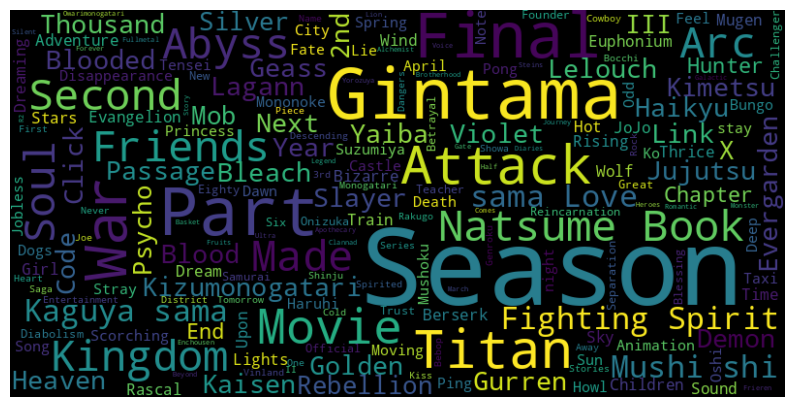

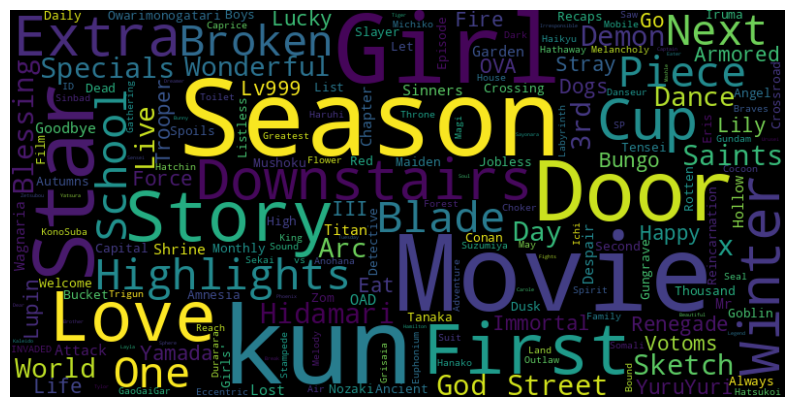

In [18]:
first_100 = df.sort_values(by='score')[-100:]

text_data = ' '.join(first_100['title_english'].dropna().tolist())
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(text_data)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


last_100 = df.sort_values(by='score')[:100]

text_data = ' '.join(last_100['title_english'].dropna().tolist())
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(text_data)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [19]:
title_english_first = first_100['title_english'].tolist()

wordlist_first = []

for title in title_english_first:
    if pd.isnull(title):
        pass
    else:
        wordlist_first.extend(preproc(title))

print('Популярные униграммы (первые 100 фильмов): ', FreqDist(wordlist_first).most_common(15))

Популярные униграммы (первые 100 фильмов):  [('season', 27), ('gintama', 9), ('part', 8), ('final', 7), ('war', 6), ('attack', 5), ('titan', 5), ('movie', 4), ('natsume', 3), ('book', 3), ('friends', 3), ('fighting', 3), ('spirit', 3), ('made', 3), ('abyss', 3)]


In [20]:
title_english_last = last_100['title_english'].tolist()

wordlist_last = []

for title in title_english_last:
    if pd.isnull(title):
        pass
    else:
        wordlist_last.extend(preproc(title))

print('Популярные униграммы (последние 100 фильмов): ', FreqDist(wordlist_last).most_common(15))

Популярные униграммы (последние 100 фильмов):  [('kun', 5), ('season', 5), ('movie', 5), ('star', 3), ('girl', 3), ('door', 3), ('love', 2), ('story', 2), ('first', 2), ('girls', 2), ('downstairs', 2), ('extra', 2), ('winter', 2), ('cup', 2), ('highlights', 2)]


Самое частое слово в популярных фильмах - season, вероятно, среди популярных аниме много сериалов. А также встречаются слова part, final, war, fighting. Возможно, боевики и продолжения фильмов пользуются большей популярностью.